In [1]:
from pathlib import Path
import sys
import os
import contextlib

with contextlib.suppress(StopIteration):
    root = next(str(x) for x in Path(os.getcwd()).parents if x.name == "chesscog")
    sys.path.append(root)
    print(root)

/Users/georg/Desktop/chesscog


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from chesscog.corner_detection.detect_corners import (
    detect_edges,
    detect_lines,
    cluster_horizontal_and_vertical_lines,
    eliminate_similar_lines,
    get_intersection_points,
    _choose_from_range,
    compute_homography,
    warp_points,
    discard_outliers,
    quantize_points,
    compute_transformation_matrix,
    compute_horizontal_borders,
    compute_vertical_borders
)
from chesscog.corner_detection.visualise import draw_lines
from chesscog.utils import sort_corner_points
from chesscog.utils.config import CfgNode as CN
from chesscog.utils.io import URI

In [3]:
cfg = CN.load_yaml_with_base(URI("config://corner_detection.yaml"))
cfg = CN.load_yaml_with_base(URI("config://corner_detection/_base.yaml"))

In [4]:
def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

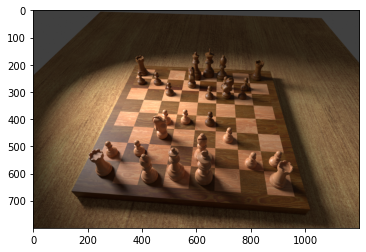

In [9]:
filename = "/Users/georg/chess_data/render/train/0064.png"
filename = "/Users/georg/chess_data/render/train/2869.png"
#filename = "/Users/georg/Desktop/chess/chess_data/images/b06.jpg"
img = cv2.imread(filename)
show(img)

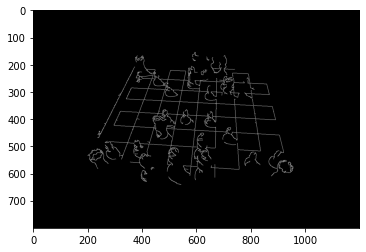

In [10]:
canny_edges = detect_edges(cfg, img)

plt.imshow(canny_edges, cmap="gray")

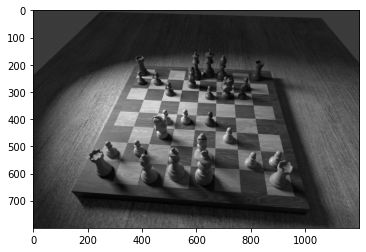

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")

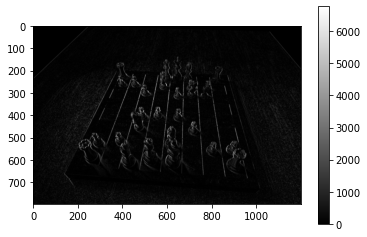

In [37]:
gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

G_x = np.abs(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5))
G_y = np.abs(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5))

G = sp.sqrt(G_x**2 + G_y**2)

plt.imshow(sobel_x, cmap="gray")
plt.colorbar()

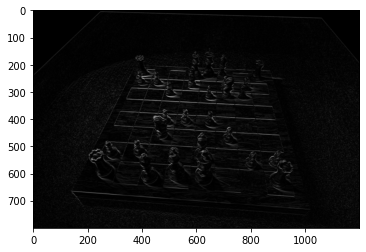

In [38]:
plt.imshow(sobel_y, cmap="gray")